In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.isna().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["gender"] = le.fit_transform(df["sex"])
df["age"].replace(np.nan, df["age"].mean(), inplace=True)

df = df[['survived', 'pclass', 'gender', 'age', 'sibsp', 'parch', 'fare']]
df.isnull().sum()

survived    0
pclass      0
gender      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [9]:
df.shape

(891, 7)

<Axes: xlabel='age', ylabel='Count'>

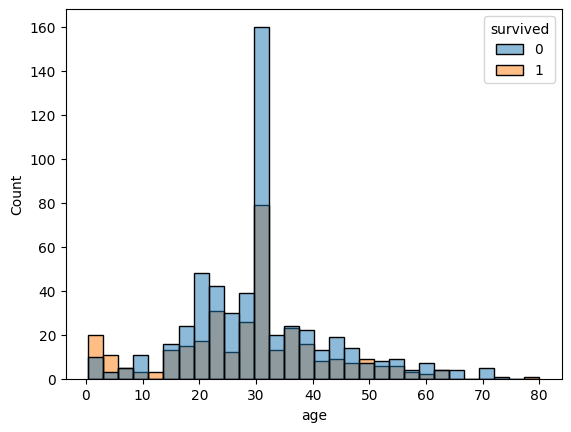

In [10]:
sns.histplot(x='age', hue='survived', data=df)

<Axes: xlabel='age', ylabel='Count'>

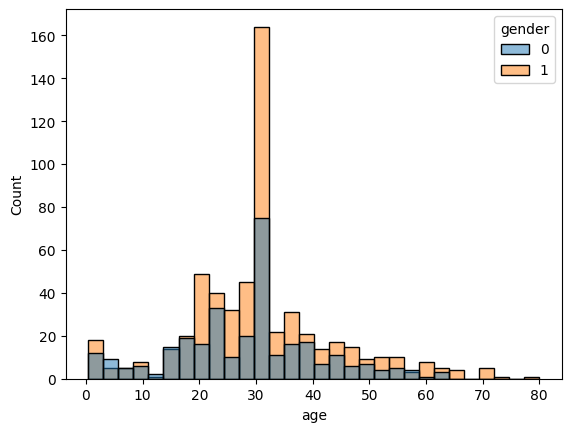

In [12]:
sns.histplot(x='age', hue='gender', data=df)

<Axes: xlabel='pclass', ylabel='Count'>

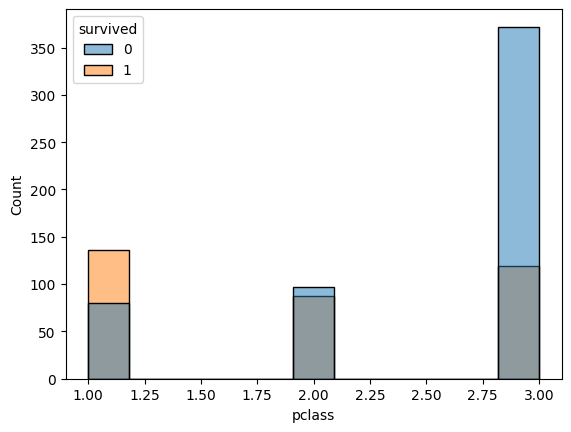

In [13]:
sns.histplot(x='pclass', hue='survived', data=df)

<Axes: xlabel='gender', ylabel='Count'>

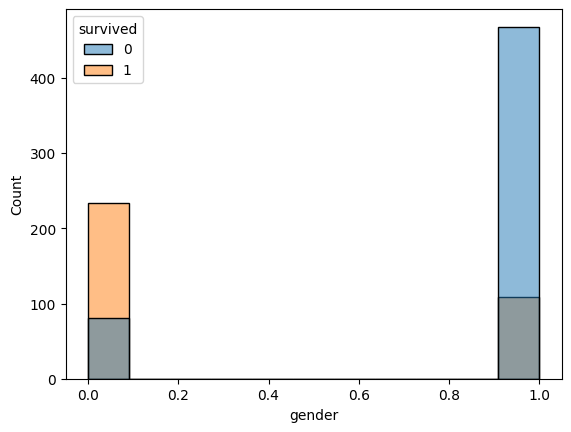

In [14]:
sns.histplot(x='gender', hue='survived', data=df)

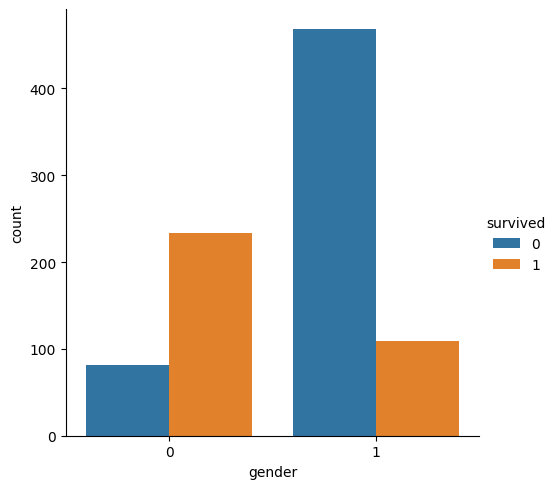

In [15]:
sns.catplot(x='gender', hue='survived', data=df, kind='count')

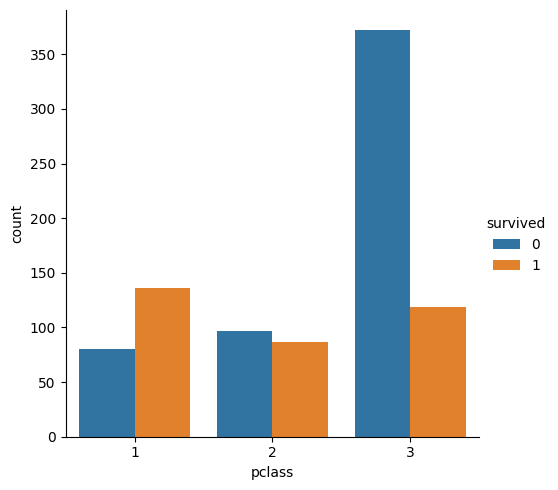

In [16]:
sns.catplot(x='pclass',hue='survived',data=df,kind='count')

<Axes: xlabel='age', ylabel='fare'>

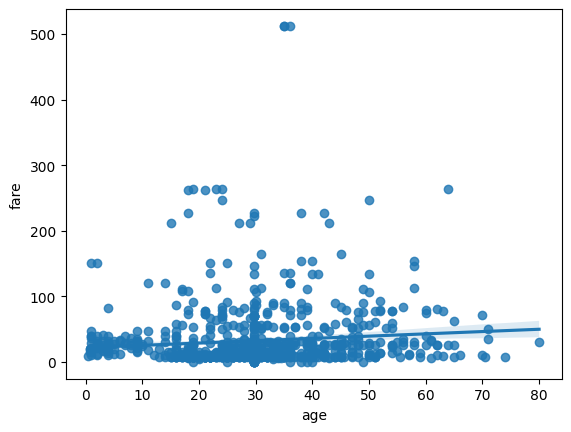

In [17]:
sns.regplot(x='age', y='fare', data=df)

<Axes: xlabel='age', ylabel='Density'>

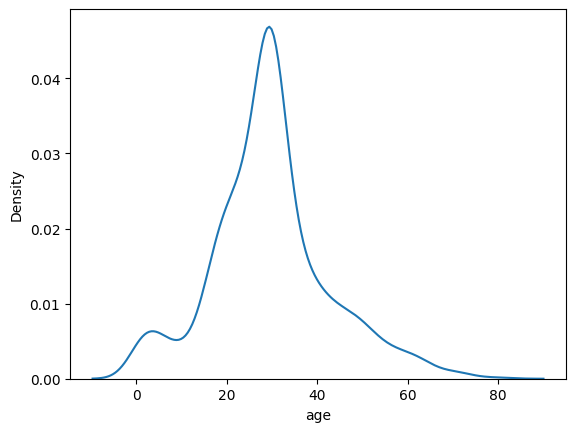

In [18]:
sns.kdeplot(df['age'])

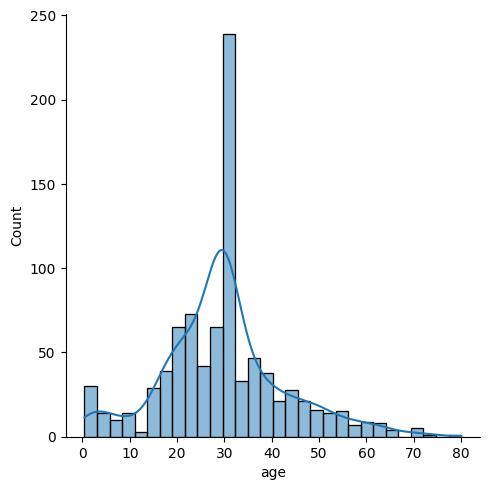

In [19]:
sns.displot(df['age'], kde=True)

In [20]:
df.columns

Index(['survived', 'pclass', 'gender', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

<Axes: xlabel='age'>

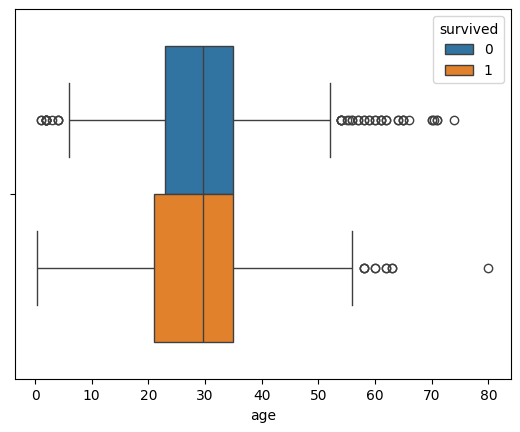

In [21]:
sns.boxplot(x='age', hue='survived', data=df)

In [ ]:
sns.boxplot(x='fare', hue='survived', data=df)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[["age", "gender", "pclass", "sibsp", "parch"]]
y = df["fare"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 5)
(179, 5)
(712,)
(179,)


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(df['fare'][:10])

print(y_train_pred[:10])

print(y_test_pred[:10])

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
6    51.8625
7    21.0750
8    11.1333
9    30.0708
Name: fare, dtype: float64
[ 5.03819618e-02  7.54568029e+01  4.77096846e+00  6.14983252e+00
  4.08875705e+01  7.81274251e+01 -6.62629064e-01  7.41305429e+01
  8.25512398e+00  3.51196849e+01]
[44.30410705  7.60622063  6.28541206 14.70058427 86.69519271  1.49503732
 75.8078314   1.49503732 36.00887074  3.15895237]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print("Unique classes in y_test:", np.unique(y_test))
print("Unique classes in y_pred:", np.unique(y_test_pred))

In [ ]:
print("Data type of y_true:", type(y_test))
print("Data type of y_pred:", type(y_test_pred))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))